In [1]:
!pip install colorspacious viscm

In [15]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt

In [17]:
import numpy as np

In [27]:
r, g, b = np.mgrid[0.0 : 1.0 : 256j, 0.0 : 1.0 : 256j, 0.0 : 1.0 : 256j]

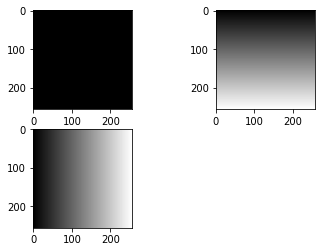

In [31]:
r[0,:,:], g[0,:,:], b[0,:,:]

plt.subplot(2, 2, 1)
plt.imshow(r[0,:,:], cmap="gray")

plt.subplot(2, 2, 2)
plt.imshow(g[0,:,:], cmap="gray")

plt.subplot(2, 2, 3)
plt.imshow(b[0,:,:], cmap="gray")

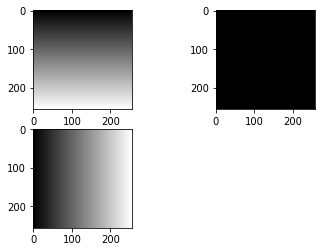

In [32]:

plt.subplot(2, 2, 1)
plt.imshow(r[:,0,:], cmap="gray")

plt.subplot(2, 2, 2)
plt.imshow(g[:,0,:], cmap="gray")

plt.subplot(2, 2, 3)
plt.imshow(b[:,0,:], cmap="gray")

In [42]:
@ipywidgets.interact(r_ind = (0, 255, 1))
def plot_all(r_ind = 0):
    plt.subplot(2, 2, 1)
    plt.imshow(r[r_ind,:,:], cmap="gray")
    plt.clim(0,1)

    plt.subplot(2, 2, 2)
    plt.imshow(g[r_ind,:,:], cmap="gray")
    plt.clim(0,1)
    
    plt.subplot(2, 2, 3)
    plt.imshow(b[r_ind,:,:], cmap="gray")
    plt.clim(0,1)
    
    rgb = np.stack([ r[r_ind,:,:], g[r_ind,:,:], b[r_ind,:,:] ], axis=-1)
    plt.subplot(2, 2, 4)
    plt.imshow(rgb)

interactive(children=(IntSlider(value=0, description='r_ind', max=255), Output()), _dom_classes=('widget-inter…

In [43]:
import matplotlib.cbook

In [59]:
grace_hopper = plt.imread(matplotlib.cbook.get_sample_data("grace_hopper.png"))

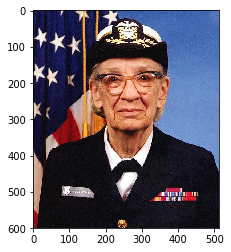

In [60]:
plt.imshow(grace_hopper)

In [61]:
def side_by_side(im1, im2):
    plt.subplot(1, 2, 1)
    plt.imshow(im1)
    plt.subplot(1, 2, 2)
    plt.imshow(im2)

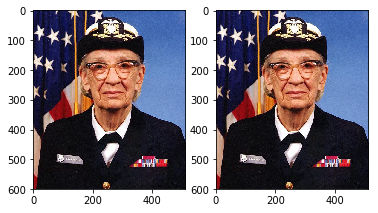

In [62]:
side_by_side(grace_hopper, grace_hopper)

In [65]:
@ipywidgets.interact(red_scale = (0.0, 2.5, 0.1),
                     green_scale = (0.0, 2.5, 0.1),
                     blue_scale = (0.0, 2.5, 0.1))
def plot_scale(red_scale = 1.0, green_scale = 1.0, blue_scale = 1.0):
    side_by_side(grace_hopper, grace_hopper *
                 [red_scale, green_scale, blue_scale])

interactive(children=(FloatSlider(value=1.0, description='red_scale', max=2.5), FloatSlider(value=1.0, descrip…

In [67]:
new_gh = colorspacious.cspace_convert(grace_hopper, "sRGB", "sRGB")

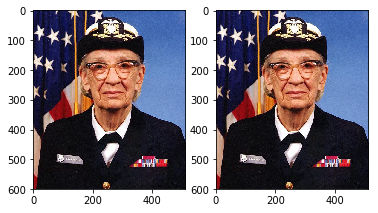

In [68]:
side_by_side(grace_hopper, new_gh)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


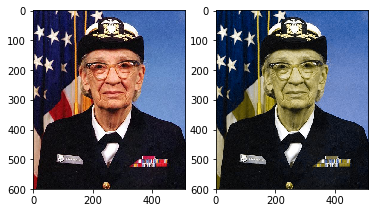

In [71]:
cvd_space = {"name": "sRGB1+CVD",
             "cvd_type": "deuteranomaly",
             "severity": 100}
new_gh = colorspacious.cspace_convert(grace_hopper, cvd_space, "sRGB1")
side_by_side(grace_hopper, new_gh)

In [76]:
@ipywidgets.interact(scale1 = (0.0, 2.5, 0.1),
                     scale2 = (0.0, 2.5, 0.1),
                     scale3 = (0.0, 2.5, 0.1))
def plot_scale(scale1 = 1.0, scale2 = 1.0, scale3 = 1.0):
    new_gh = colorspacious.cspace_convert(grace_hopper, "sRGB1", "JCh")
    new_gh *= [scale1, scale2, scale3]
    new_gh = colorspacious.cspace_convert(new_gh, "JCh", "sRGB1")
    side_by_side(grace_hopper, new_gh)

interactive(children=(FloatSlider(value=1.0, description='scale1', max=2.5), FloatSlider(value=1.0, descriptio…

In [77]:
colorspacious.cspace_convert([255, 0, 0], "sRGB1", "JCh")

array([11620.39600966,   536.36486023,    57.54515432])

In [78]:
colorspacious.cspace_convert([0, 255, 0], "sRGB1", "JCh")

array([13113.95877443,   370.45623244,   127.80308071])

In [171]:
x_vals = np.mgrid[0.0:1.0:256j]
def interpolate_colors(left_color, right_color, space = "JCh"):
    c1 = colorspacious.cspace_convert(left_color, "sRGB1", space)
    c2 = colorspacious.cspace_convert(right_color, "sRGB1", space)
    new_1 = np.interp(x_vals, [0.0, 1.0], [c1[0], c2[0]])
    new_2 = np.interp(x_vals, [0.0, 1.0], [c1[1], c2[1]])
    new_3 = np.interp(x_vals, [0.0, 1.0], [c1[2], c2[2]])
    space_interp = np.array([new_1, new_2, new_3]).T
    return colorspacious.cspace_convert(space_interp, space, "sRGB1").astype("uint8")

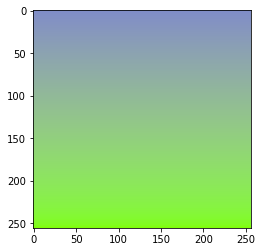

In [172]:
new_image = np.zeros((256, 256, 3), dtype="uint8")
new_image[:,:,:] = interpolate_colors([128, 141, 200], [128, 255, 10],
                                      space="CIELab")[:,None,:]
plt.imshow(new_image)
n1 = new_image

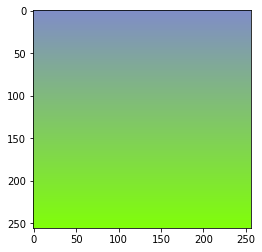

In [173]:
new_image = np.zeros((256, 256, 3), dtype="uint8")
new_image[:,:,:] = interpolate_colors([128, 141, 200], [128, 255, 10],
                                      space="sRGB1")[:,None,:]
plt.imshow(new_image)
n2 = new_image

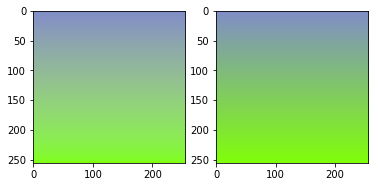

In [174]:
side_by_side(n1, n2)

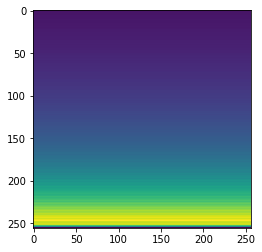

In [175]:
plt.imshow((n1/n2)[:,:,2])

In [176]:
import matplotlib.colors

In [180]:
@ipywidgets.interact(left_color = ipywidgets.ColorPicker(),
                    right_color = ipywidgets.ColorPicker(),
                    space = ["sRGB1", "CIELab", "JCh"])
def make_interp(left_color, right_color, space = "sRGB1"):
    left_color = (np.array(matplotlib.colors.to_rgb(left_color)) * 255).astype("uint8")
    right_color = (np.array(matplotlib.colors.to_rgb(right_color)) * 255).astype("uint8")
    print(left_color, right_color)
    new_image = np.zeros((256, 256, 3), dtype="uint8")
    new_image[:,:,:] = interpolate_colors(left_color, right_color,
                                          space=space)[:,None,:]
    plt.imshow(new_image)

interactive(children=(ColorPicker(value='black', description='left_color'), ColorPicker(value='black', descrip…

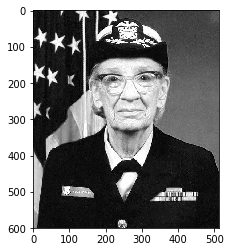

In [184]:
plt.imshow(grace_hopper[:,:,0], cmap="gray")

/home/mturk/conda-py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


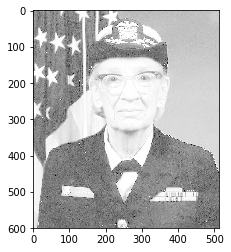

In [185]:
plt.imshow(np.log10(grace_hopper[:,:,0]), cmap="gray")

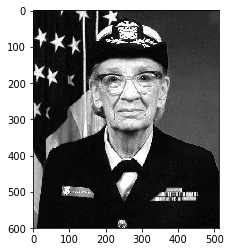

In [186]:
plt.imshow(np.exp(grace_hopper[:,:,0]), cmap="gray")

In [187]:
x = np.mgrid[0.0 : 2.0 * np.pi : 256j]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


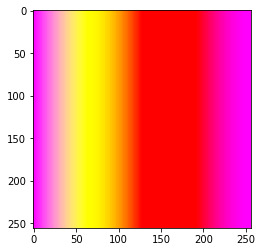

In [193]:
image = np.ones((256, 256, 3))
image[:,:,1] = np.sin(x)
image[:,:,2] = np.cos(x)
plt.imshow(image)

In [195]:
jch = colorspacious.cspace_convert(np.mgrid[0.0:255:256j,
                                      0.0:255:256j,
                                      0.0:255:256], "sRGB1", "JCh")

In [197]:
jch.max(axis=0).max(axis=0).max(axis=0)

array([13657.9544919 ,    14.6864397 ,   211.05716453])

In [198]:
jch.min(axis=0).min(axis=0).min(axis=0)

array([3.25891324e-22, 4.07145763e-24, 0.00000000e+00])

In [204]:
@ipywidgets.interact(start_offset = (0., 14.6864397, .1),
                     number_of_points = (2, 10))
def show_colors(start_offset = 0.0, number_of_points = 2):
    cycle_offset = np.mgrid[0.0:1.0:number_of_points*1j]
    new_c = np.fmod(start_offset + cycle_offset* 14.6864397, 14.6864397)

interactive(children=(FloatSlider(value=0.0, description='start_offset', max=14.6864397), IntSlider(value=2, d…

In [206]:
x, y = np.mgrid[-.5:.5:256j, -.5:0.5:256j]

In [231]:
r = (x**2 + y**2)**2 - 0.1

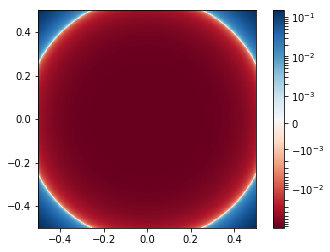

In [242]:
plt.imshow(r, cmap="RdBu", extent = [-0.5, 0.5, -0.5, 0.5],
          norm = matplotlib.colors.SymLogNorm(0.001))
plt.colorbar()